# Data Preparation For Final Training

The datasets contain three different type of resource.

1. Resource from RTL resource.
2. Resource from dictionary sample sentence.
3. Resource from RTL resource 2024.


## Data Preprocessing

### Dictionary data

Drop NA Before: 56376
Drop NA After: 56376


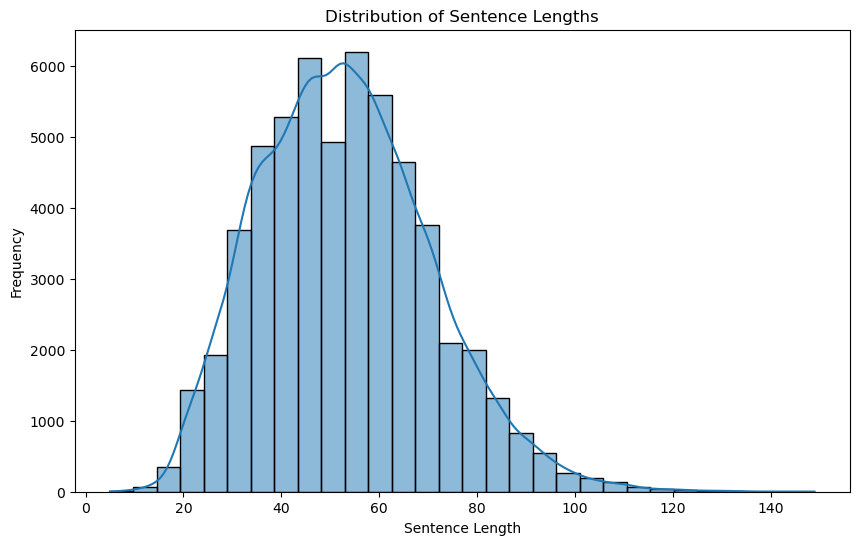

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

test_df = pd.read_json('data/processed/dic_sentences.jsonl', lines=True)

print (f"Drop NA Before: {len(test_df)}")
test_df.dropna(subset=["sentence"], inplace=True)
print (f"Drop NA After: {len(test_df)}")
test_df["sentence"] = test_df["sentence"].str.strip().str.capitalize()
test_df["sentence_length"] = test_df["sentence"].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(test_df["sentence_length"], bins=30, kde=True)
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.title("Distribution of Sentence Lengths")
plt.show()


In [62]:
from langchain.prompts import PromptTemplate

def generate_translation_prompt(text, language_1="Luxembourgish", language_2="English"):
    """Generate a translation prompt."""
    prompt_template = """Please translate the following {language_1} text into {language_2}. Please answer me with only translated text!

    ---------------------------------- Text to be translated ----------------------------------

    {Text}

    ---------------------------------- Text to be translated ----------------------------------

    """
    translation_prompt = PromptTemplate(
        input_variables=["language_1", "language_2", "Text"],
        template=prompt_template
    )
    return translation_prompt.format(language_1=language_1, language_2=language_2, Text=text)

test_df["input"] = test_df["sentence"].apply(generate_translation_prompt)
test_df["index"] = test_df.index

In [48]:
test_df.to_json("data/processed/dic_sentences_prompt.jsonl", lines=True, orient="records")

In [63]:
test_df[["index","sentence"]].to_json("data/processed/dic_sentences_shortened.jsonl", lines=True, orient="records")

In [ ]:
# test_df.to_json("data/processed/dic_sentences.jsonl", orient="records", lines=True)

### RTL 2024

40632
40543


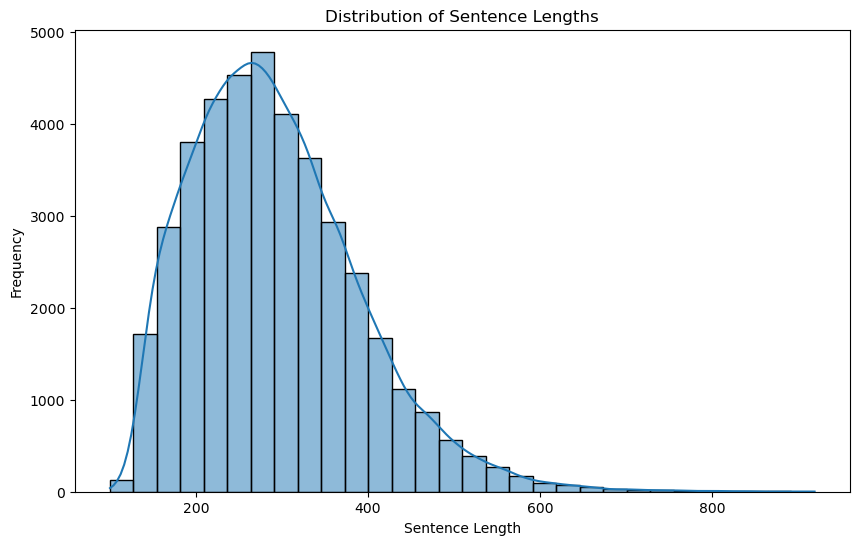

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_output_df = pd.read_json('data/processed/RTL2024_subsentences.jsonl',lines=True)
filtered_output_df["subsentence"] = filtered_output_df["subsentence"].astype(str)
print(len(filtered_output_df))
filtered_output_df = filtered_output_df[~filtered_output_df["subsentence"].str.contains("LINK", case=True, na=False)]
print(len(filtered_output_df))


filtered_output_df["sentence_length"] = filtered_output_df["subsentence"].str.len()
plt.figure(figsize=(10, 6))
sns.histplot(filtered_output_df["sentence_length"], bins=30, kde=True)
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.title("Distribution of Sentence Lengths")
plt.show()

#### Preparation Prompts

In [65]:
from langchain.prompts import PromptTemplate

def generate_translation_prompt(text, language_1="Luxembourgish", language_2="English"):
    """Generate a translation prompt."""
    prompt_template = """Please translate the following {language_1} text into {language_2}. Please answer me with only translated text!

    ---------------------------------- Text to be translated ----------------------------------

    {Text}

    ---------------------------------- Text to be translated ----------------------------------

    """
    translation_prompt = PromptTemplate(
        input_variables=["language_1", "language_2", "Text"],
        template=prompt_template
    )
    return translation_prompt.format(language_1=language_1, language_2=language_2, Text=text)

filtered_output_df["input"] = filtered_output_df["subsentence"].apply(generate_translation_prompt)
filtered_output_df["index"] = filtered_output_df.index

In [53]:
filtered_output_df.to_json("data/processed/RTL2024_subsentences_prompt.jsonl", lines=True, orient="records")

In [66]:
filtered_output_df[["index","subsentence"]].to_json("data/processed/RTL2024_subsentences_shortened.jsonl", lines=True, orient="records")

### RTL Prev

In [55]:
import pandas as pd

df = pd.read_csv('/Users/lujun.li/projects/mt_luxembourgish/data/pre-processing/NC_lux_subsentences.csv')

In [57]:
df.to_json("data/processed/RTL_PREV.jsonl", orient="records", lines=True)

In [58]:
df.columns

Index(['index', 'subsentence', 'window_size', 'label', 'text',
       'subsentence_len', 'lang_detection', 'is_luxembourgish'],
      dtype='object')

In [59]:
df[["index","subsentence"]].to_json("data/processed/RTL_PREV_shortened.jsonl", orient="records", lines=True)

### Put all together

In [77]:
import pandas as pd

RTL_PREV = pd.read_json('data/processed/RTL_PREV_shortened.jsonl', lines=True)
RTL2024 = pd.read_json('data/processed/RTL2024_subsentences_shortened.jsonl', lines=True)
dic_subsentences = pd.read_json('data/processed/dic_sentences_shortened.jsonl', lines=True)

RTL_PREV = RTL_PREV.rename(columns={'subsentence': 'input'})
RTL2024 = RTL2024.rename(columns={'subsentence': 'input'})
dic_subsentences = dic_subsentences.rename(columns={'sentence': 'input'})

RTL_PREV['dataset'] = 'RTL_PREV'
RTL2024['dataset'] = 'RTL2024'
dic_subsentences['dataset'] = 'dictionary'

combined_df = pd.concat([RTL_PREV, RTL2024, dic_subsentences], ignore_index=True)

In [79]:
combined_df.to_json("data/processed/dataset_merged.jsonl", orient="records", lines=True)

## Put Them Together 

In [1]:
import pandas as pd

dict_70b_df = pd.read_json("data/source/vllm_exp_dataset_csv_Llama-3.3-70B-Instruct__20250131_193801.jsonl", lines=True)
RTL2024_70b_df = pd.read_json("data/source/vllm_exp_dataset_csv_Llama-3.3-70B-Instruct__20250131_193957.jsonl", lines=True)
RTL_PREV_70b_df = pd.read_csv("data/output/fake_targets/translation_llama3_70b_complete.csv")


RTL_PREV_nllb_df = pd.read_csv("data/output/fake_targets/translation_nllb_complete.csv")
dict_nllb_df = pd.read_json("data/source/nllb_en_20250131_184742.jsonl", lines=True)
RTL2024_nllb_df = pd.read_json("data/source/nllb_en_20250131_184630.jsonl", lines=True)


df = pd.read_json("data/processed/dataset_merged.jsonl", lines=True)


In [2]:
RTL_PREV = df[df["dataset"]=="RTL_PREV"]

RTL_PREV_70b = RTL_PREV_70b_df[["subsentence","translated_text"]].rename(columns={"subsentence":"input"})

RTL_PREV_merged = pd.merge(RTL_PREV, RTL_PREV_70b, on="input", how="inner")

RTL2024 = df[df["dataset"]=="RTL2024"]

RTL2024_merged = pd.merge(RTL2024_70b_df, RTL2024, on="index", how="inner")

RTL2024_merged = RTL2024_merged.rename(columns={"input_y":"input", "generate_response":"translated_text"})

RTL2024_merged = RTL2024_merged[["index","input","dataset","translated_text"]]

dict_ = df[df["dataset"]=="dictionary"]

dict_merged = pd.merge(dict_70b_df, dict_, on="index", how="inner")

dict_merged = dict_merged.rename(columns={"input_y":"input", "generate_response":"translated_text"})

dict_merged = dict_merged[["index","input","dataset","translated_text"]]


In [3]:
df_merged_llama3_70B = pd.concat([RTL_PREV_merged, RTL2024_merged, dict_merged])

In [4]:
df_merged_llama3_70B.dataset.value_counts()

null_counts = df_merged_llama3_70B.isna().sum()

for column, count in null_counts.items():
    print(f"'{column}' has: {count} null values")


'index' has: 0 null values
'input' has: 0 null values
'dataset' has: 0 null values
'translated_text' has: 0 null values


In [5]:
df_merged_llama3_70B.to_json("data/processed/dataset_merged_llama3_70B_fake_targets.jsonl", orient="records", lines=True)

In [6]:
RTL_PREV = df[df["dataset"]=="RTL_PREV"]

RTL_PREV_70b = RTL_PREV_nllb_df[["subsentence","translated_text"]].rename(columns={"subsentence":"input"})

RTL_PREV_merged = pd.merge(RTL_PREV, RTL_PREV_70b, on="input", how="inner")

RTL2024 = df[df["dataset"]=="RTL2024"]
RTL2024_nllb_df = RTL2024_nllb_df.rename(columns={"subsentence":"input"})
RTL2024_merged = pd.merge(RTL2024_nllb_df, RTL2024, on="input", how="inner")
RTL2024_merged = RTL2024_merged.rename(columns={"index_y":"index"})
RTL2024_merged = RTL2024_merged[["index","input","dataset","translated_text"]]

dict_ = df[df["dataset"]=="dictionary"]
dict_nllb_df = dict_nllb_df.rename(columns={"sentence":"input"})
dict_merged = pd.merge(dict_nllb_df, dict_, on="input", how="inner")
dict_merged = dict_merged[["index","input","dataset","translated_text"]]

# dict_merged = dict_merged[["index","input","dataset","translated_text"]]


In [7]:
df_merged_nllb = pd.concat([RTL_PREV_merged, RTL2024_merged, dict_merged])
df_merged_nllb.drop_duplicates(subset=["input"], inplace=True)

In [8]:
df_merged_nllb.to_json("data/processed/dataset_merged_nllb_fake_targets.jsonl", orient="records", lines=True)

In [9]:
index_unique_df = pd.read_json("/Users/lujun.li/projects/mt_luxembourgish/data/processed/dataset_merged_llama_fake_targets_with_split.jsonl",  lines=True)

unique_mapping = dict(zip(index_unique_df['index_unique'], index_unique_df['input']))


In [71]:
df_merged_nllb["translation_source"] = "nllb"
df_merged_llama3_70B["translation_source"] = "llama3_70B"
df_nllb_llama3_70B = pd.concat([df_merged_nllb, df_merged_llama3_70B])

In [72]:
import numpy as np
reverse_mapping = {v: k for k, v in unique_mapping.items()}
df_nllb_llama3_70B['index_unique'] = df_nllb_llama3_70B['input'].map(reverse_mapping)
df_nllb_llama3_70B.dropna(subset=['index_unique'], inplace=True)
df_nllb_llama3_70B['index_unique'] = df_nllb_llama3_70B['index_unique'].astype(np.int64)

In [75]:
df_nllb_llama3_70B.to_json("data/processed/dataset_merged_llama_nllb_fake_targets.jsonl", orient="records", lines=True)

## Seperate to Train Validation


In [13]:
index_unique_df = pd.read_json("data/processed/dataset_merged_llama_fake_targets_with_split.jsonl",  lines=True)

unique_mapping_index_unique_to_split = dict(zip(index_unique_df['index_unique'], index_unique_df['split']))

unique_mapping_index_unique_to_input = dict(zip(index_unique_df['index_unique'], index_unique_df['input']))

unique_mapping_input_to_index_unique = {v: k for k, v in unique_mapping_index_unique_to_input.items()}


In [98]:
import pandas as pd

df = pd.read_json("data/processed/dataset_merged_nllb_fake_targets.jsonl", lines=True)


df['index_unique'] = df['input'].map(unique_mapping_input_to_index_unique)
df.dropna(subset=['index_unique'], inplace=True)
df['index_unique'] = df['index_unique'].astype(np.int64)
df['split'] = df['index_unique'].map(unique_mapping_index_unique_to_split)


In [101]:
df.to_json("data/processed/dataset_merged_nllb_fake_targets_with_split.jsonl", orient='records', lines=True)

In [102]:
import pandas as pd

df = pd.read_json("data/processed/dataset_merged_llama_nllb_fake_targets.jsonl", lines=True)

df['index_unique'] = df['input'].map(unique_mapping_input_to_index_unique)
df.dropna(subset=['index_unique'], inplace=True)
df['index_unique'] = df['index_unique'].astype(np.int64)
df['split'] = df['index_unique'].map(unique_mapping_index_unique_to_split)

df.to_json("data/processed/dataset_merged_llama_nllb_fake_targets_with_split.jsonl", orient='records', lines=True)

In [ ]:
import pandas as pd

df = pd.read_json("data/processed/dataset_merged_llama_fake_targets.jsonl", lines=True)

df['index_unique'] = df['input'].map(unique_mapping_input_to_index_unique)
df.dropna(subset=['index_unique'], inplace=True)
df['index_unique'] = df['index_unique'].astype(np.int64)
df['split'] = df['index_unique'].map(unique_mapping_index_unique_to_split)

df.to_json("data/processed/dataset_merged_llama_fake_targets_with_split.jsonl", orient='records', lines=True)

+ GPT

In [2]:
import pandas as pd

df = pd.read_json("/Users/lujun.li/projects/mt_luxembourgish/data/processed/dataset_openai_soft.jsonl", lines=True)

df_llama_with_split = pd.read_json("/Users/lujun.li/projects/mt_luxembourgish/data/processed/dataset_merged_llama_fake_targets_with_split.jsonl", lines=True)

merged_df = pd.merge(df_llama_with_split, df, on=["input", "index"], how="left", suffixes=("_llama", "_soft"))

merged_df = merged_df.drop_duplicates(subset=["index_unique"])

merged_df.rename(columns={"dataset_llama": "dataset", "translated_text_soft": "translated_text"}, inplace=True)

merged_df = merged_df[["index_unique", "input", "translated_text", "dataset","split"]]


merged_df.to_json("/Users/lujun.li/projects/mt_luxembourgish/data/processed/dataset_merged_GPT_fake_targets_with_split.jsonl", orient="records", lines=True)

In [24]:
llama = pd.read_json("data/processed/dataset_merged_llama_fake_targets_with_split.jsonl", lines=True)
nllb = pd.read_json("data/processed/dataset_merged_nllb_fake_targets_with_split.jsonl", lines=True)
GPT4_df = pd.read_json("data/processed/dataset_merged_GPT_fake_targets_with_split.jsonl", lines=True)

nllb["translation_source"] = "nllb"
llama["translation_source"] = "llama3_70B"
GPT4_df["translation_source"] = "GPT4"

df_merged = pd.concat([llama, nllb, GPT4_df])   

df_merged.to_json("data/processed/dataset_merged_llama_nllb_GPT_fake_targets_with_split.jsonl", orient="records", lines=True)

## Dictionary Correction


In [63]:
import pandas as pd 
import numpy as np

df_merged = pd.read_json("data/processed/dataset_merged_llama_nllb_GPT_fake_targets_with_split.jsonl", lines=True)

In [64]:
df_dict_checking = pd.read_json("data/processed/dataset_dict_soft.jsonl", lines=True)

In [65]:
df_dict_checking['index_unique'] = df_dict_checking['input'].map(unique_mapping_input_to_index_unique)
df_dict_checking.dropna(subset=['index_unique'], inplace=True)
df_dict_checking.drop_duplicates(subset=['index_unique'], inplace=True)
df_dict_checking['index_unique'] = df_dict_checking['index_unique'].astype(np.int64)
df_dict_checking['split'] = df_dict_checking['index_unique'].map(unique_mapping_index_unique_to_split)

df_dict_checking["translation_source"] = "Dictionary_Checking_After_GPT"

def remove_quotes(s):
    return s.strip('"') if isinstance(s, str) else s
df_dict_checking['translated_text'] = df_dict_checking['translated_text'].apply(remove_quotes)

In [66]:
df_merged = pd.concat([df_merged,df_dict_checking])   

In [67]:
counts = df_merged['index_unique'].value_counts()
filtered_indices = counts[counts < 4].index 

In [68]:
df_merged = df_merged[~df_merged['index_unique'].isin(filtered_indices)]

In [ ]:
## Remove JS code 

import re

js_pattern = re.compile(r'function\s*\(|document\.|window\.|var\s+\w+\s*=|console\.log\(', re.DOTALL)
df_merged = df_merged[~df_merged['input'].apply(lambda x: bool(js_pattern.search(x)))]

In [83]:
df_merged.to_json("data/processed/dataset_merged_llama_nllb_GPT_Dict_fake_targets_with_split.jsonl", orient="records", lines=True)